In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:

# Load dataset
df = pd.read_csv('dataset_limbah_energi.csv')
df.head()


,Jenis Limbah,Berat (kg),Kadar Air (%),Estimasi Energi (kWh)
0,Sekam Padi,210.80,10.69,758.29
1,Kulit Kakao,486.99,42.54,1360.26
2,Kulit Kopi,39.70,20.79,126.66
3,Jerami Padi,409.16,44.05,747.19
4,Jerami Padi,304.00,46.41,531.73


In [3]:

# 1. Pra-pemrosesan Data
# Cek missing value
print(df.isnull().sum())

# Encoding variabel kategori (Jenis Limbah)
le = LabelEncoder()
df['Jenis Limbah'] = le.fit_transform(df['Jenis Limbah'])

# Normalisasi berat dan kadar air
scaler = StandardScaler()
df[['Berat (kg)', 'Kadar Air (%)']] = scaler.fit_transform(df[['Berat (kg)', 'Kadar Air (%)']])


Jenis Limbah             0
Berat (kg)               0
Kadar Air (%)            0
Estimasi Energi (kWh)    0
dtype: int64


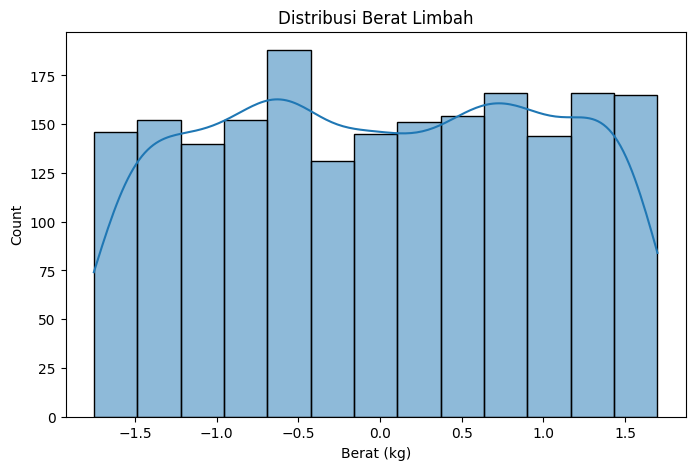

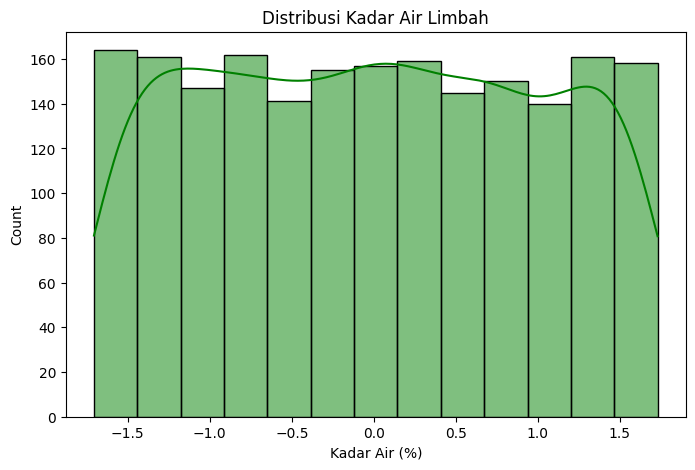

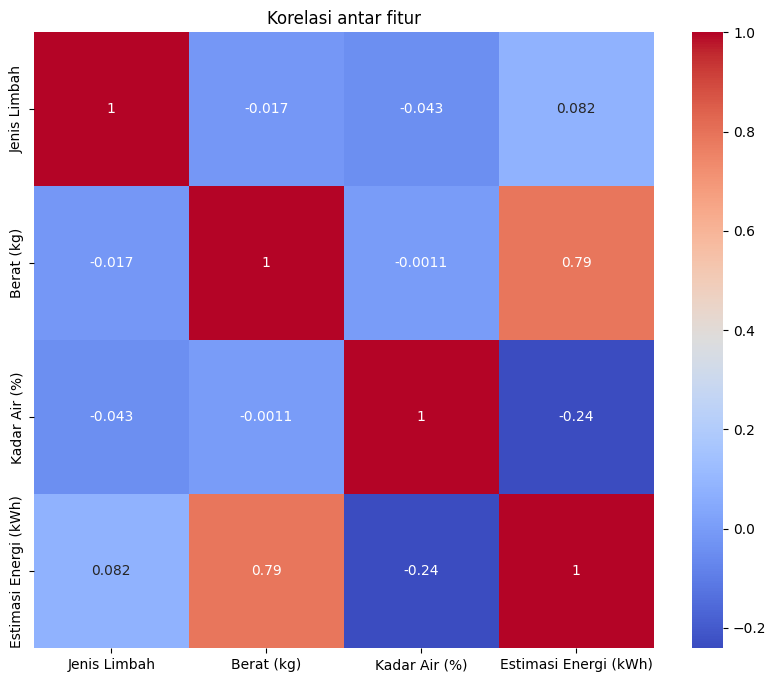

In [4]:

# 2. Exploratory Data Analysis (EDA)

# Visualisasi distribusi berat
plt.figure(figsize=(8,5))
sns.histplot(df['Berat (kg)'], kde=True)
plt.title('Distribusi Berat Limbah')
plt.show()

# Visualisasi distribusi kadar air
plt.figure(figsize=(8,5))
sns.histplot(df['Kadar Air (%)'], kde=True, color='green')
plt.title('Distribusi Kadar Air Limbah')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur')
plt.show()


In [5]:

# 3. Pemilihan Algoritma dan Pelatihan Model

X = df.drop('Estimasi Energi (kWh)', axis=1)
y = df['Estimasi Energi (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:

# 4. Evaluasi Model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 24.12
Mean Squared Error (MSE): 1170.90
R2 Score: 0.99


In [7]:

# 5. Optimasi Model (Hyperparameter Tuning)

best_r2 = r2
best_model = model

for n in [50, 100, 150]:
    for depth in [5, 10, None]:
        temp_model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)
        temp_model.fit(X_train, y_train)
        temp_r2 = r2_score(y_test, temp_model.predict(X_test))
        if temp_r2 > best_r2:
            best_r2 = temp_r2
            best_model = temp_model

print(f"Best R2 Score after tuning: {best_r2:.2f}")


Best R2 Score after tuning: 0.99
